<a href="https://colab.research.google.com/github/rhqtmfajfl/python-study/blob/master/tensorflow/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A4%80%EB%B9%84_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%940702.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

## 이미지 시각화 및 형상(shape) 확인


In [ ]:
image = x_train[0]
image.shape

(28, 28)

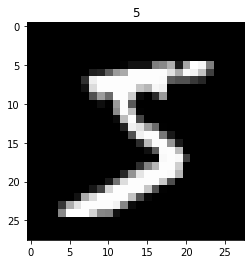

In [ ]:
plt.imshow(image, 'gray')
plt.title(y_train[0])
plt.show()

## CNN레이어에 삽입하기 위한 배열 편집
* 4차원 형태의 데이터를 유지해야 한다.
* `(N,H,W,C)` -> (배치크기,높이, 가로, 채널)
* MNIST 손글씨 이미지 : 높이 - 28px, 가로 - 28px, 채널 - 1pc
* 1장의 이미지 - `(28,28)` -> (1,28,28,1)로바꿔줘야 한다.

In [ ]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape #(배치사이즈,Hin, Win, Cin)

(1, 28, 28, 1)

# Conv 레이어 사용하기
keras의 대표적인 CNN 레이어는 두가지가 있다.
1. Conv2D (디맨션이 2개이기 때문에 2D 차원이 두개이다.)- 움직이는 방향이 두방향으로 움직이기 때문이

  * `stride`가 2 방향으로 움직인다.(가로, 세로)
  * 이미지 분석을 위해 사용되는 일반적인 합성곱 레이어
2. Conv1D
  * `stride`가 1 방향으로 움직인다. (세로)
  * 텍스트 분석을 위해 사용되는 레이어.(대표적인 에 `char CNN`)

# Conv2D 매개변수 확인
* `filters` : 필터의 개수 ($C_{out}$)
* `kernel_size`: 필터의 크기 ($K_H$, $K_W$)
* `strides` : 몇 개의 픽셀을 스킵하면서 필터가 훑게 할지 결정 (스트라이드가 커지면 출력 특징맵의 크기가 줄어 든다.)
* `padding` : 0으로 쌓여진 패딩을 만들것인지에 대한 설정
  * `VALID` : 이건 패딩을 만들지 않는다.
  * `SAME` : 한개 짜리 패딩 생성 - 이미지 주변을 한줄로 감싸기
* `activation` : 활성화 함수 지정하기. 따로 지정하지 않고 추후에 레이어로 추가 가능



In [ ]:
tf.keras.layers.Conv2D(
    filters = 3, # 필터 개수
    kernel_size = (3,3), # 필터의 (세로, 가로) 크기 H, W -> 1 x1, 3 x 3, 5 x 5, 7x7 필터를 주로 사용
    # 1 x 1 bottleneck에서 사용
    strides = (1,1), # 이동 크기
    padding = 'SAME', #0으로 감싸진 패딩 패딩 여부(same - 패딩 적용, valid - 패딩 미적용(기본 적용))
    activation='relu' # 활성화 함수 적용 (여기서 안넣고 레이어로 따로 추가 가능.)
)

In [ ]:
# 필터의 세로 가로 크기 및 스트라이드의 세로 가로를 똑같이 하려면 굳이 튜플을 쓸 필욘 없다.
tf.keras.layers.Conv2D(
    filters=3,
    kernel_size = 3, # 3 x 3  필터
    strides = 1, #1x1 stride
    padding='SAME',
    activation='relu'
)  # 위의 코드와 같은 의미

# Convolution 레이어 시각화

In [ ]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [ ]:
image.shape

TensorShape([1, 28, 28, 1])

In [ ]:
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1,
                               padding='SAME')


In [ ]:
output = layer(image) # image를 레이어에 통과 시킴
output.shape

TensorShape([1, 28, 28, 5])

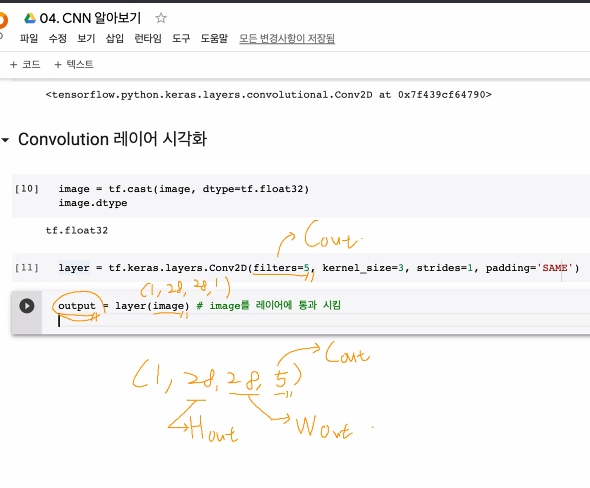

출력 특징 맵이 5개!!

In [ ]:
# 출력 특징 맵을 시각화 해보세요
# 앞에는 원본이미지, 그 뒤에는 출력 특징 맵 시각화 하기

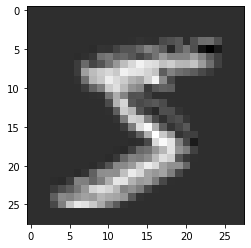

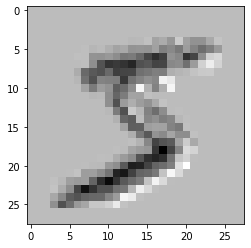

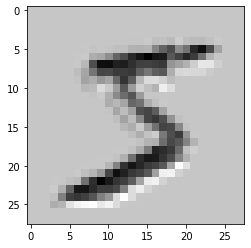

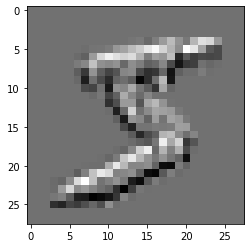

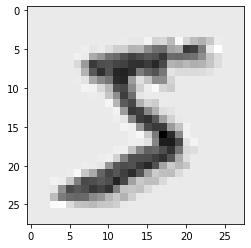

In [ ]:
plt.imshow(image[0, :,:, 0], 'gray')
plt.imshow(output[0,:,:,0], 'gray')
plt.show()
plt.imshow(output[0,:,:,1], 'gray')
plt.show()
plt.imshow(output[0,:,:,2], 'gray')
plt.show()
plt.imshow(output[0,:,:,3], 'gray')
plt.show()
plt.imshow(output[0,:,:,4], 'gray')
plt.show()

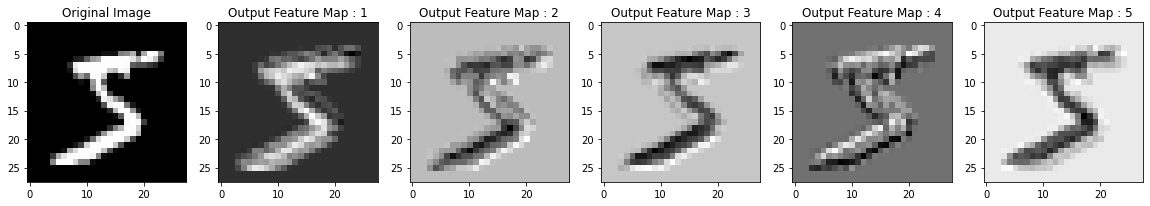

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("Output Feature Map : {}".format(idx + 1))
  ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

## Filter 시각화
* CNN에서 Filter의역할은 실제 CNN 레이어가이미지의무엇을 보고 있는가를 이야기 한다.
* `keras`의레이어들은 get_weights() 함수를 이용해서 편향과, 가중치등을 볼수 있따.

In [ ]:
# Conv2D 레이어의 필터 모양 :( 3,3,1,5) - (필터 세로, 필터 가로, 입력 특징 맵의 채널 개수, 출력 특징 맵의 채녈 개수)
weights = layer.get_weights()


* `weights[0]` : 가중치가 들어있음
* `weights[1]` : 편향이 들어 있음



In [ ]:
print("가중치(필터)의 형상 : {}".format(weights[0].shape))
print("편향의 형상 : {}".format(weights[1].shape))

가중치(필터)의 형상 : (3, 3, 1, 5)
편향의 형상 : (5,)


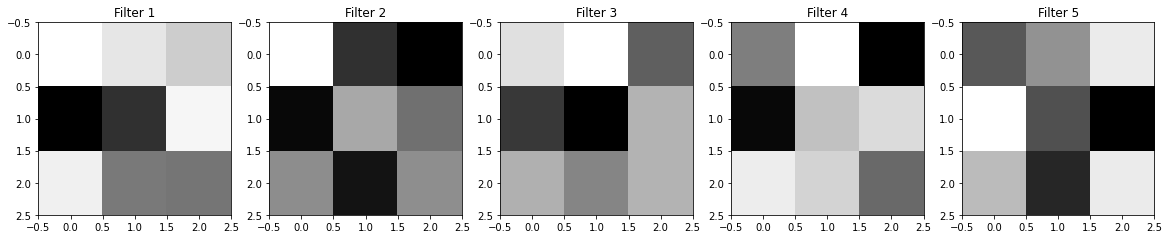

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter {}".format(idx +1))
  ax.imshow(weights[0][...,0, idx], cmap ='gray')

plt.show()
# _, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

# for idx, ax in enumerate(axes):
#   ax.set_title("Filter {}".format(idx + 1))
#   ax.imshow(weights[0][..., 0, idx], cmap='gray')

# plt.show()

# ReLU 레이어 사용하기
* 이미지 분석에서 `ReLU` 가 자주 사용된다.
* 이미지 데이터에서 음수 데이터는 필요가 없는 데이터이다.
  * 필요 없는 음수 데이터는 제거하고, 의미 있는 양수 데이터만 강조하기 위해서 ReLU가 일반적으로 사용된다.

In [ ]:
import numpy as np
np.min(output), np.max(output)

(-196.9815, 219.79901)

In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output) # 합성곱의 결과가 활성화 레이어로 들어간다.
act_output.shape

TensorShape([1, 28, 28, 5])

In [ ]:
np.min(act_output), np.max(act_output)

(0.0, 219.79901)

ReLU 시각화

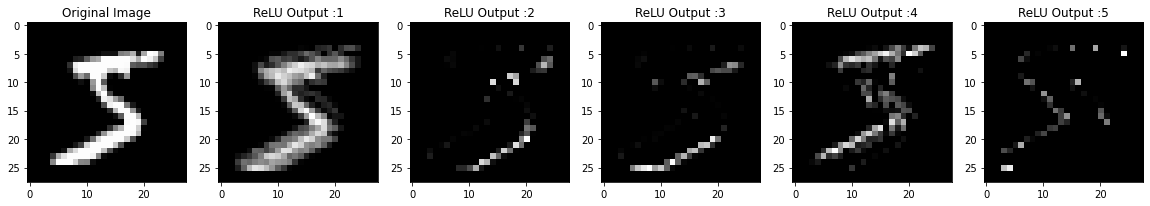

In [ ]:
_, axes = plt.subplots(nrows=1, ncols = 6, figsize=(20,10))

axes[0].imshow(image[0,...,0], cmap ='gray')
axes[0].set_title('Original Image')

for idx, ax in enumerate(axes[1:]):
  ax.set_title('ReLU Output :{}'.format(idx+1))
  ax.imshow(act_output[0,...,idx], cmap='gray')

plt.show()

# MaxPolling 레이어 사용하기
* Pooling 과정을 통해 이미지 축소 및 정보의 종합을 구현할 수 있다.

In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME') # pool_size 풀링할 커널의 크기 
pool_output = pool_layer(act_output)
pool_output.shape

TensorShape([1, 14, 14, 5])

# MaxPooling 시각화

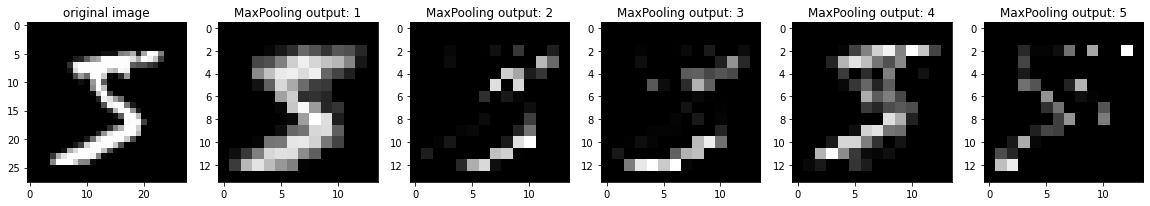

In [ ]:
_, axes = plt.subplots(nrows = 1, ncols = 6, figsize=(20,10))

axes[0].imshow(image[0,...,0], cmap='gray')
axes[0].set_title('original image')

for idx, ax in enumerate(axes[1:]):
  ax.set_title('MaxPooling output: {}'.format(idx +1))
  ax.imshow(pool_output[0][...,idx], cmap='gray')

plt.show()

# 여기까지의 과정을 특징 추출 과정(Feature Extraction)

In [ ]:
# 필터가 5에 대한 특징들을 뽑아 냈다.

# Flatten 레이어 확인하기
* `MaxPool2D` 까지는 특징 추출 과정
  * 예측을 하기 위한 과정이 아닌, 데이터(이미지)에 대한 특징만 추출
* 예측을 수행하기 위해서는 `Fully Connected`(전결합) 과정이 필요하다.
  * `Dense` 레이어를 사용한다.
* `Fully Connected Layer`를 사용하기 위해서는 데이터가 **평탄화**되어 있어야 한다.

In [ ]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

flatten_output.shape # 980 = 14 * 14 * 5

TensorShape([1, 980])

# Dense 레이어 확인하기
* 계산 과정 $WX+b$을 하기 위한 `Dense`레이어. `Fully Connected Layer` 라고도 한다.
전결합 계층을 만들어라 - Dense레이어를 만들어라 fc라고 나온다.

In [ ]:
# 유닛이 32개인 Dense 레이어 만들기 - 은닉층
dense_layer = tf.keras.layers.Dense(32, activation='relu')
dense_output = dense_layer(flatten_output)

dense_output.shape

TensorShape([1, 32])

In [ ]:
#출력층 설계
# 숫자는 10 종류니까 출력층의뉴런 개수도 10개
dense_layer2 = tf.keras.layers.Dense(10, activation='relu')
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

In [ ]:
layer = tf.keras.layers.Conv2D(filters = 32, 
                               kernel_size=(3,3), 
                               strides = 1, 
                               padding='SAME',
                               activation ='relu'
                              )



In [ ]:
output = layer(image)

layer2 = tf.keras.layers.Conv2D(filters = 32,
                                kernel_size=3,
                                strides=3,
                                padding='SAME', 
                                activation='relu')


In [ ]:
# from tensorflow.keras.layers import Conv2D, Dense, Flatten
# from tensorflow.keras.models import Sequential

# model = Sequential([
#     input_shape=(28,28)
#     tf.keras.layers.Conv2D(input_shape,
#                                 kernel_size=3,
#                                 strides=1,
#                                 padding='SAME', 
#                                 activation='relu'),
#     tf.keras.layers.Conv2D(filters = 32,
#                           kernel_size=3,
#                           strides=1,
#                           padding='SAME', 
#                           activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2),
#                                     strides=1, padding='SAME')),
#      Dense(tf.keras.layers.Conv2D(filters = 32,
#                           kernel_size=3,
#                           strides=1,
#                           padding='SAME', 
#                           activation='relu')),
    
# ])

SyntaxError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ReLU, MaxPool2D, Flatten, Dense, Input

model = Sequential([
  Input(shape=(28, 28, 1)),
  Conv2D(filters=32, kernel_size=3, padding='SAME'),
  ReLU(),
  Conv2D(filters=32, kernel_size=3, padding='SAME'),
  ReLU(),
  MaxPool2D(pool_size=(2, 2)),

  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=(2, 2)),

  Flatten(),

  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
re_lu_4 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        3

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# x 데이터에 채널 차원 추가
x_train = x_train[..., tf.newaxis]
x_test  = x_test[..., tf.newaxis]

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# 이미지 정규화 작업
# 255.0 으로 나눠주면 된다.

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model.fit(x_train,
          y_train,)

   4/1875 [..............................] - ETA: 4:10 - loss: 0.3823 - acc: 0.9062

KeyboardInterrupt: ignored